<a href="https://colab.research.google.com/github/raulbenitez/Tirana_CV/blob/main/IMAGE%20SEGMENTATION/Segmentation_Clustering_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE SEGMENTATION USING CLUSTERING ALGORITHMS

To apply a clustering algorithm, we first need a numerical dataset with N observations and d features. In the case of an RGB image, the number of observations corresponds to the number of pixels of the image and the number of features corresponds to the number of color channels. 

We first read the image and reshape the data as a Nxd array 

In [ ]:
import skimage as sk
import numpy as np


I = sk.data.astronaut() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],I.shape[2]))
print('The sape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape

Here N = 262144 and d = 3
The sape of the array should be 262144 x 3


(262144, 3)

## 1. K-means

K-means algorithm:

[1] Specify the number of clusters  𝑘  to be found in data.

[2] Set initial values for the cluster centroids  𝜇01,…,𝜇0𝑘  (at random or prior knowledge).

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations  𝜇11,…,𝜇1𝑘 .

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering  𝜇𝑛1,…,𝜇𝑛𝑘 , where  𝑛  is the number of iterations.

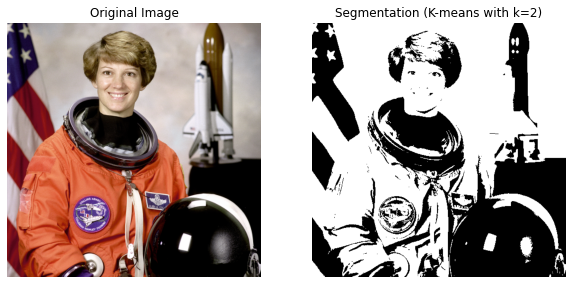

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1])) # reshape back to original image size
 # Shape back result as image 

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

## 2. Gaussian Mixture Models (GMM) 

We model the distribution of the multidimensional observations using a mixture of gaussian distributions: 

  ## $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma)$

  ## $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

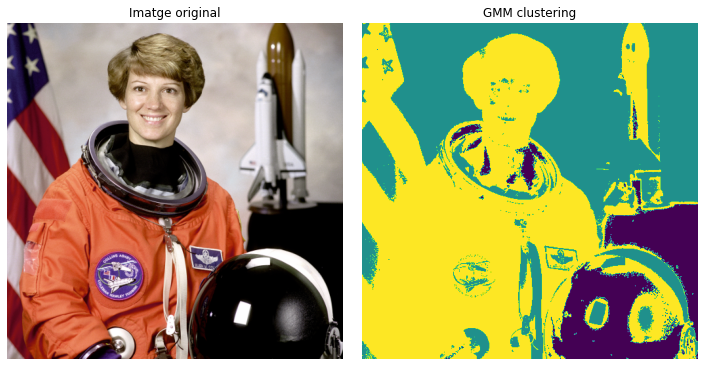

In [ ]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Imatge original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

## 3. How many clusters? GMM with BIC model selection

${\displaystyle \mathrm {BIC} =k\ln(n)-2\ln({\widehat {L}})\ }$

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v_I)
    bic.append(gmm.bic(v_I))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm_win = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v_I)



[8019969.219591582]
[8019969.219591582, 7627399.372061836]
[8019969.219591582, 7627399.372061836, 6352181.456829567]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423, 5696037.911883137]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423, 5696037.911883137, 5592432.227658681]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423, 5696037.911883137, 5592432.227658681, 5569010.012517705]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423, 5696037.911883137, 5592432.227658681, 5569010.012517705, 5533464.320132788]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423, 5696037.911883137, 5592432.227658681, 5569010.012517705, 5533464.320132788, 5467796.37514112]
[8019969.219591582, 7627399.372061836, 6352181.456829567, 6108985.631027423, 5696037.911883137, 5592432.227658681, 5569010.012517705, 553

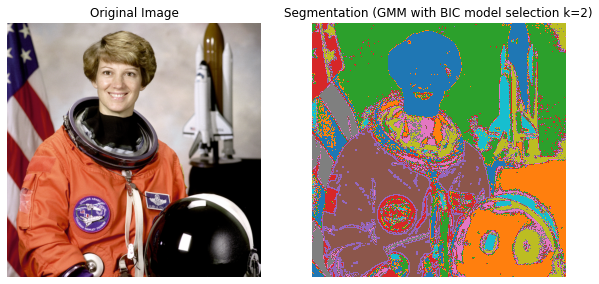

In [ ]:
v_gmm = gmm_win.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm_bic = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_gmm_bic, cmap=plt.cm.tab10)
ax2.set_title('Segmentation (GMM with BIC model selection k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()